In [ ]:
from google.colab import drive
import zipfile
import os
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
zip_path = '/content/drive/MyDrive/Project FER/Raf-DB.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/extracted_files')
print("ZIP extracted!")

ZIP extracted!


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [ ]:
data_dir = '/content/extracted_files/DATASET'
train_set = os.path.join(data_dir, 'train')
test_set = os.path.join(data_dir, 'test')

In [ ]:
train_data = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_data = ImageDataGenerator(rescale=1./255)
test_data = ImageDataGenerator(rescale=1./255)
train_generator = train_data.flow_from_directory(
    train_set,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical')
test_generator = test_data.flow_from_directory(
    test_set,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical')

Found 12271 images belonging to 7 classes.
Found 3068 images belonging to 7 classes.


In [ ]:
train_classes = os.listdir(train_set)
test_classes = os.listdir(test_set)
print(train_classes)
print(test_classes)

['3', '1', '4', '2', '7', '5', '6']
['3', '1', '4', '2', '7', '5', '6']


In [ ]:
train_counts = {}
for cls in train_classes:
    train_counts[cls] = len(os.listdir(os.path.join(train_set, cls)))

test_counts = {}
for cls in test_classes:
    test_counts[cls] = len(os.listdir(os.path.join(test_set, cls)))
print(train_counts)
print(test_counts)

{'3': 717, '1': 1290, '4': 4772, '2': 281, '7': 2524, '5': 1982, '6': 705}
{'3': 160, '1': 329, '4': 1185, '2': 74, '7': 680, '5': 478, '6': 162}


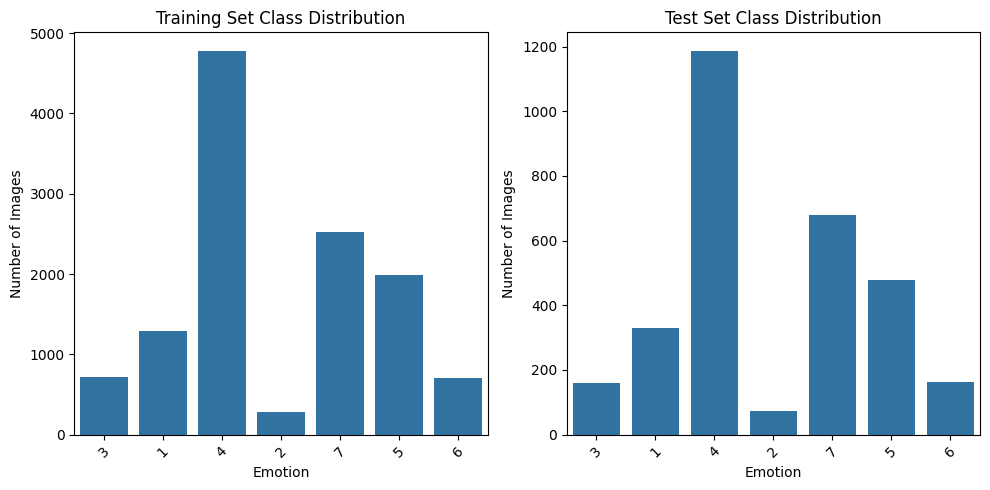

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from PIL import Image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.barplot(x=list(train_counts.keys()), y=list(train_counts.values()))
plt.title('Training Set Class Distribution')
plt.xlabel('Emotion')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x=list(test_counts.keys()), y=list(test_counts.values()))
plt.title('Test Set Class Distribution')
plt.xlabel('Emotion')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

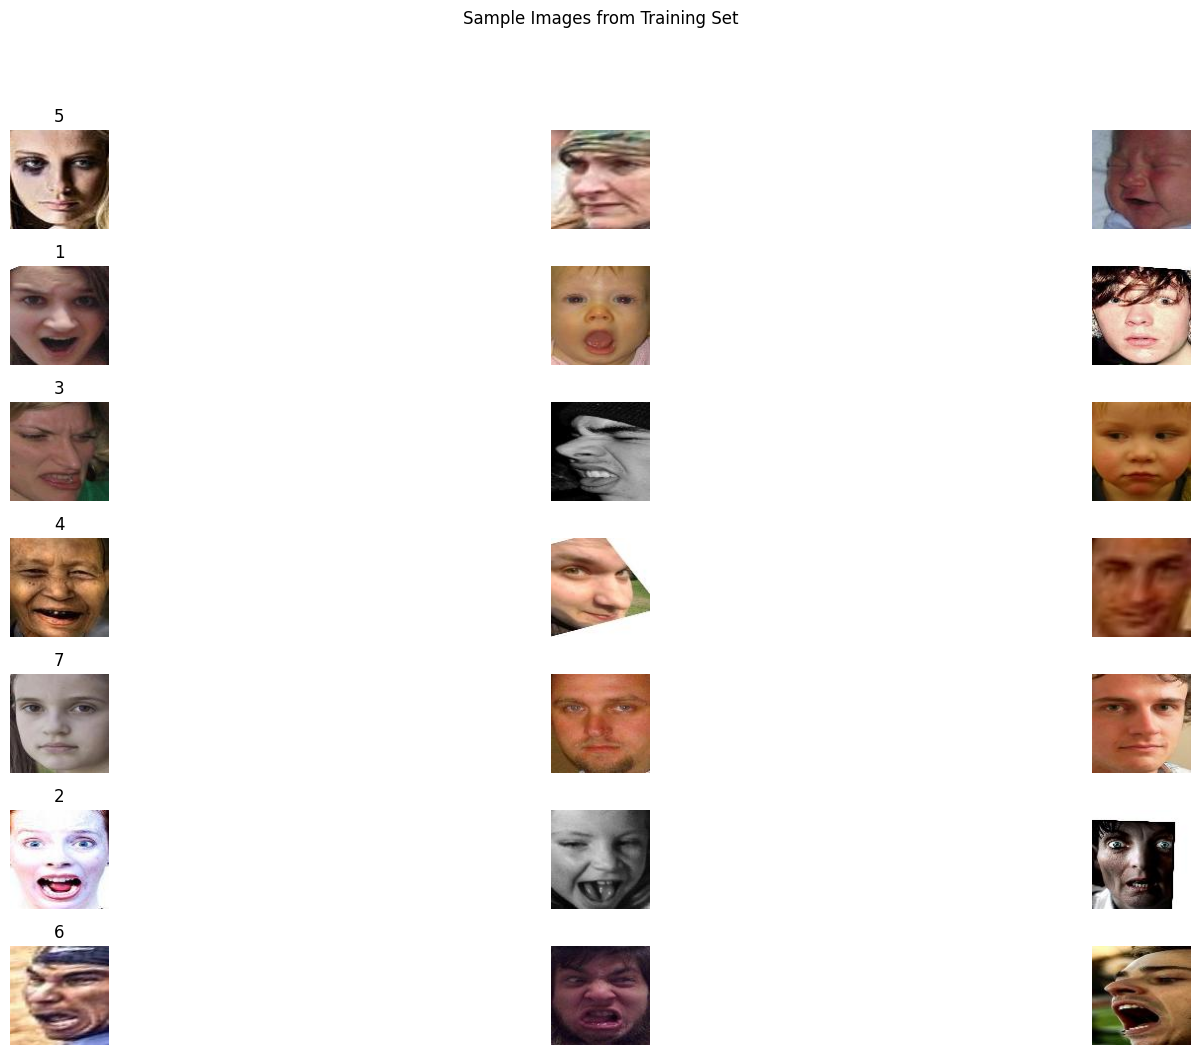

In [ ]:
import random
def plot_sample_images(directory, classes, num_samples=3):
    plt.figure(figsize=(20, 10))
    for i, cls in enumerate(classes):
        class_path = os.path.join(directory, cls)
        image_files = os.listdir(class_path)
        samples = random.sample(image_files, min(num_samples, len(image_files)))

        for j, img_file in enumerate(samples):
            img_path = os.path.join(class_path, img_file)
            img = Image.open(img_path)
            plt.subplot(len(classes), num_samples, i * num_samples + j + 1)
            plt.imshow(img, cmap='gray')
            plt.axis('off')
            if j == 0:
                plt.title(cls)
    plt.suptitle('Sample Images from Training Set', y=1.05)
    plt.tight_layout()
    plt.show()

plot_sample_images(train_set, train_classes)

In [ ]:
train_data = ImageDataGenerator(rescale=1./255)
test_data = ImageDataGenerator(rescale=1./255)
train_generator = train_data.flow_from_directory(
    train_set,
    target_size=(48,48),
    batch_size=32,
    class_mode='categorical')
test_generator = test_data.flow_from_directory(
    test_set,
    target_size=(48,48),
    batch_size=32,
    class_mode='categorical')
num_classes = train_generator.num_classes


Found 12271 images belonging to 7 classes.
Found 3068 images belonging to 7 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
def build_alexnet(input_shape=(48,48, 3), num_classes=7):
    model = Sequential()

    model.add(Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=input_shape, padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

    model.add(Conv2D(256, (5, 5), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

    model.add(Conv2D(384, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(384, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))

    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    return model

model = build_alexnet(input_shape=(48, 48, 3), num_classes=num_classes)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 12, 12, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 12, 12, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 5, 5, 96)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 5, 5, 256)      │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 5, 5, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 2, 2, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 2, 2, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 2, 2, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │     1,052,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │        28,679 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,611,271 (82.44 MB)

 Trainable params: 21,610,567 (82.44 MB)

 Non-trainable params: 704 (2.75 KB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1)

In [ ]:
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=40,
    steps_per_epoch=len(train_generator),
    validation_steps=len(test_generator),
    callbacks=[early_stop, lr_reduce]
)

Epoch 1/40
384/384 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.7229 - loss: 0.7755 - val_accuracy: 0.6741 - val_loss: 0.9573 - learning_rate: 4.0000e-05
Epoch 2/40
384/384 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.7318 - loss: 0.7637 - val_accuracy: 0.6724 - val_loss: 0.9607 - learning_rate: 4.0000e-05
Epoch 3/40
384/384 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.7330 - loss: 0.7553 - val_accuracy: 0.6724 - val_loss: 0.9554 - learning_rate: 4.0000e-05
Epoch 4/40
384/384 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.7404 - loss: 0.7244 - val_accuracy: 0.6653 - val_loss: 0.9678 - learning_rate: 4.0000e-05
Epoch 5/40
384/384 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.7426 - loss: 0.7489 - val_accuracy: 0.6587 - val_loss: 0.9829 - learning_rate: 4.0000e-05
Epoch 6/40
382/384 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7422 - loss: 0.7384
Epoch 6: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
384/384 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - acc

In [ ]:
model.save('/content/drive/MyDrive/alexnet_fer_model.h5')

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/alexnet_fer_model.h5')

loss, accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy*100:.2f}%")
loss, accuracy = model.evaluate(train_generator)
print(f"Train Accuracy: {accuracy*100:.2f}%")

96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.6678 - loss: 0.9703
Test Accuracy: 67.24%
384/384 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.7493 - loss: 0.7180
Train Accuracy: 74.39%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


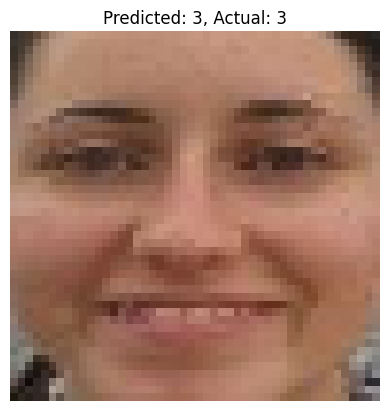

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x_test, y_test = next(test_generator)
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)
plt.imshow(x_test[0])
plt.title(f"Predicted: {predicted_classes[0]}, Actual: {true_classes[0]}")
plt.axis('off')
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(48, 48, 1), padding='same'))
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(7, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

color_mode='grayscale'

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 48, 48, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 24, 24, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 20, 20, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 10, 10, 16)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 120)            │       192,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 7)              │           595 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 205,451 (802.54 KB)

 Trainable params: 205,451 (802.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
train_generator = train_data.flow_from_directory(
    train_set,
    target_size=(48, 48),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical'
)
test_generator = test_data.flow_from_directory(
    test_set,
    target_size=(48, 48),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical'
)

Found 12271 images belonging to 7 classes.
Found 3068 images belonging to 7 classes.


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1)

In [ ]:
history = model.fit(
    train_generator,
    epochs=40,
    validation_data=test_generator,
    steps_per_epoch=len(train_generator),
    validation_steps=len(test_generator),
    callbacks=[early_stop, lr_reduce]
)

Epoch 1/40
384/384 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - accuracy: 0.4394 - loss: 1.5504 - val_accuracy: 0.6050 - val_loss: 1.1350 - learning_rate: 0.0010
Epoch 2/40
384/384 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.6180 - loss: 1.0812 - val_accuracy: 0.6581 - val_loss: 0.9757 - learning_rate: 0.0010
Epoch 3/40
384/384 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.6611 - loss: 0.9568 - val_accuracy: 0.6467 - val_loss: 0.9522 - learning_rate: 0.0010
Epoch 4/40
384/384 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.6845 - loss: 0.8858 - val_accuracy: 0.6842 - val_loss: 0.8799 - learning_rate: 0.0010
Epoch 5/40
384/384 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.7043 - loss: 0.8186 - val_accuracy: 0.6907 - val_loss: 0.8651 - learning_rate: 0.0010
Epoch 6/40
384/384 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.7359 - loss: 0.7564 - val_accuracy: 0.6995 - val_loss: 0.8579 - learning_rate: 0.0010
Epoch 7/40
384/384 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.7497 - loss:

In [ ]:
model.save('/content/drive/MyDrive/lenet_fer_model.h5')

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/lenet_fer_model.h5')

In [ ]:
loss, accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy*100:.2f}%")
loss, accuracy = model.evaluate(train_generator)
print(f"Train Accuracy: {accuracy*100:.2f}%")

96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7331 - loss: 0.7843
Test Accuracy: 72.62%
384/384 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.8292 - loss: 0.4883
Train Accuracy: 82.89%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


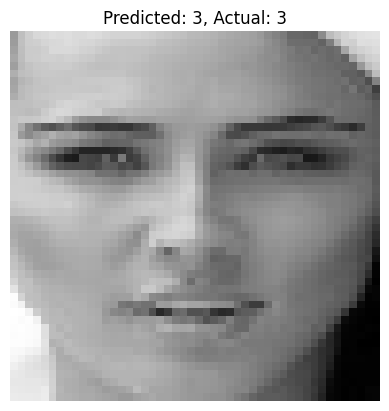

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x_test, y_test = next(test_generator)
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)
plt.imshow(x_test[0].reshape(48,48), cmap='gray')
plt.title(f"Predicted: {predicted_classes[0]}, Actual: {true_classes[0]}")
plt.axis('off')
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam

model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1), padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 48, 48, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,689,607 (17.89 MB)

 Trainable params: 4,688,711 (17.89 MB)

 Non-trainable params: 896 (3.50 KB)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_data.flow_from_directory(
    train_set,
    target_size=(48, 48),
    color_mode="grayscale",
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_data.flow_from_directory(
    test_set,
    target_size=(48, 48),
    color_mode="grayscale",
    batch_size=32,
    class_mode='categorical'
)


Found 12271 images belonging to 7 classes.
Found 3068 images belonging to 7 classes.


In [ ]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',
                           patience=5,
                           restore_best_weights=True)


In [ ]:
history = model.fit(
    train_generator,
    epochs=40,
    validation_data=test_generator,
    callbacks=[early_stop]
)

Epoch 1/40


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


384/384 ━━━━━━━━━━━━━━━━━━━━ 27s 45ms/step - accuracy: 0.3300 - loss: 1.9349 - val_accuracy: 0.3862 - val_loss: 1.6645
Epoch 2/40
384/384 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.4173 - loss: 1.5561 - val_accuracy: 0.4889 - val_loss: 1.3602
Epoch 3/40
384/384 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.5010 - loss: 1.3656 - val_accuracy: 0.5932 - val_loss: 1.1470
Epoch 4/40
384/384 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.5519 - loss: 1.2107 - val_accuracy: 0.6190 - val_loss: 1.0640
Epoch 5/40
384/384 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.6003 - loss: 1.0915 - val_accuracy: 0.6666 - val_loss: 0.9347
Epoch 6/40
384/384 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.6354 - loss: 1.0132 - val_accuracy: 0.6793 - val_loss: 0.8829
Epoch 7/40
384/384 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.6578 - loss: 0.9408 - val_accuracy: 0.7001 - val_loss: 0.8462
Epoch 8/40
384/384 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.6834 - loss: 0.8830 - val_accurac

In [ ]:
model.save('/content/drive/MyDrive/SimpleCNN2_fer_model.h5')

In [ ]:
loss, accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy*100:.2f}%")
loss, accuracy = model.evaluate(train_generator)
print(f"Train Accuracy: {accuracy*100:.2f}%")

96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.8197 - loss: 0.5724
Test Accuracy: 80.64%
384/384 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9572 - loss: 0.1678
Train Accuracy: 95.75%


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


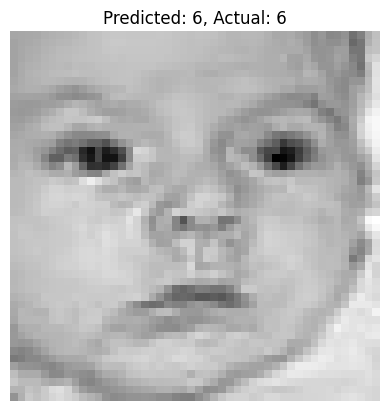

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x_test, y_test = next(test_generator)
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)
plt.imshow(x_test[0].reshape(48,48), cmap='gray')
plt.title(f"Predicted: {predicted_classes[0]}, Actual: {true_classes[0]}")
plt.axis('off')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/SimpleCNN2_fer_model.h5')

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes

96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step


In [ ]:
cm = confusion_matrix(y_true, y_pred)

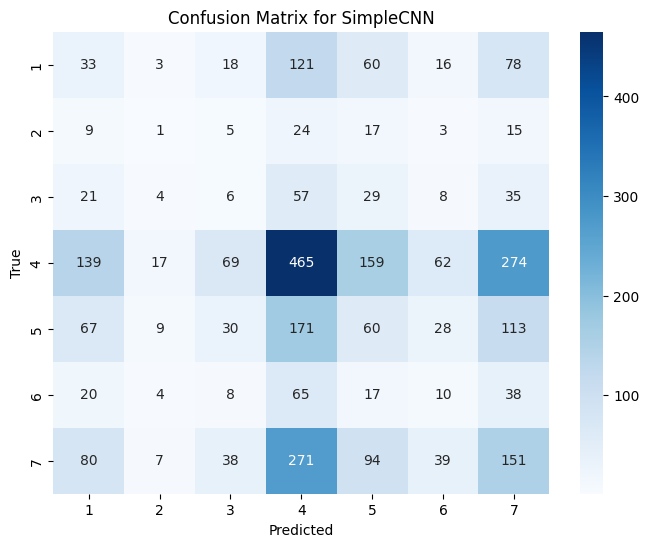

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices,
            yticklabels=test_generator.class_indices)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for SimpleCNN')
plt.show()

In [ ]:
from tensorflow.keras.backend import clear_session
clear_session()

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/lenet_fer_model.h5')

In [ ]:
x_pred = model.predict(test_generator)
x_pred_classes = np.argmax(x_pred, axis=1)

x_true = test_generator.classes
cm = confusion_matrix(x_true, x_pred_classes)

96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step


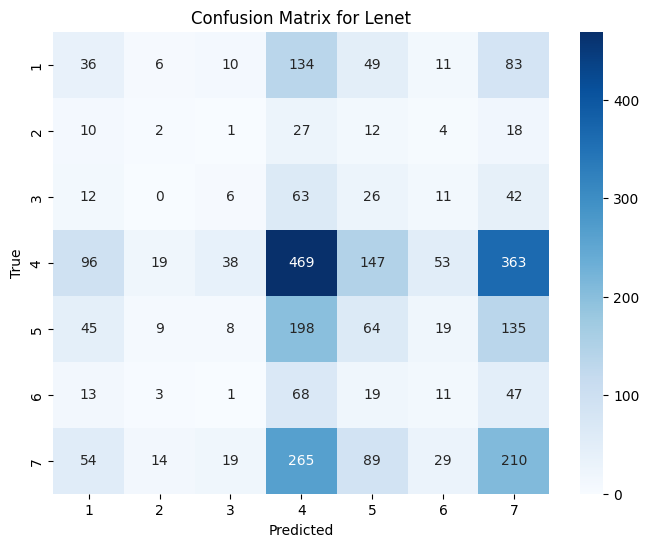

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices,
            yticklabels=test_generator.class_indices)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Lenet')
plt.show()

In [ ]:
from tensorflow.keras.backend import clear_session
clear_session()

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/alexnet_fer_model.h5')

In [ ]:
z_pred = model.predict(test_generator)
z_pred_classes = np.argmax(z_pred, axis=1)

z_true = test_generator.classes
cm = confusion_matrix(z_true, z_pred_classes)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step


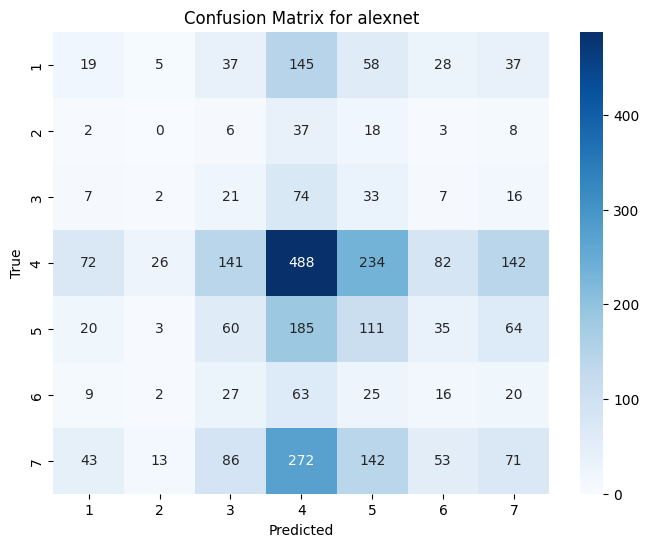

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices,
            yticklabels=test_generator.class_indices)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for alexnet')
plt.show()

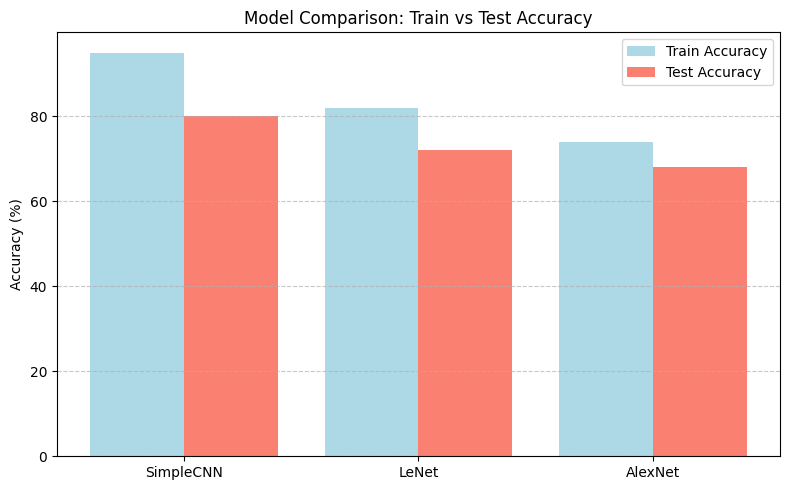

In [ ]:
import matplotlib.pyplot as plt

models = ['SimpleCNN', 'LeNet', 'AlexNet']

train_acc = [95, 82, 74]
test_acc = [80, 72, 68]

x = range(len(models))

plt.figure(figsize=(8,5))
plt.bar(x, train_acc, width=0.4, label='Train Accuracy', align='center', color='lightblue')
plt.bar([i + 0.4 for i in x], test_acc, width=0.4, label='Test Accuracy', align='center', color='salmon')

plt.xticks([i + 0.2 for i in x], models)
plt.ylabel('Accuracy (%)')
plt.title('Model Comparison: Train vs Test Accuracy')
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report
import numpy as np

model = load_model('/content/drive/MyDrive/alexnet_fer_model.h5')

y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

y_true = test_generator.classes

class_labels = list(test_generator.class_indices.keys())

print(classification_report(y_true, y_pred_classes, target_names=class_labels))


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


96/96 ━━━━━━━━━━━━━━━━━━━━ 12s 124ms/step
              precision    recall  f1-score   support

           1       0.09      0.10      0.10       329
           2       0.03      0.01      0.02        74
           3       0.00      0.00      0.00       160
           4       0.39      0.41      0.40      1185
           5       0.18      0.17      0.17       478
           6       0.03      0.02      0.03       162
           7       0.20      0.24      0.22       680

    accuracy                           0.25      3068
   macro avg       0.13      0.14      0.13      3068
weighted avg       0.23      0.25      0.24      3068



In [ ]:
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report
import numpy as np

model = load_model('/content/drive/MyDrive/lenet_fer_model.h5')

y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

y_true = test_generator.classes

class_labels = list(test_generator.class_indices.keys())

print(classification_report(y_true, y_pred_classes, target_names=class_labels))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step
              precision    recall  f1-score   support

           1       0.12      0.09      0.10       329
           2       0.04      0.03      0.03        74
           3       0.02      0.01      0.02       160
           4       0.40      0.41      0.41      1185
           5       0.15      0.13      0.14       478
           6       0.06      0.05      0.05       162
           7       0.21      0.28      0.24       680

    accuracy                           0.25      3068
   macro avg       0.14      0.14      0.14      3068
weighted avg       0.24      0.25      0.25      3068



In [ ]:
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report
import numpy as np

model = load_model('/content/drive/MyDrive/SimpleCNN2_fer_model.h5')

y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

y_true = test_generator.classes

class_labels = list(test_generator.class_indices.keys())

print(classification_report(y_true, y_pred_classes, target_names=class_labels))

96/96 ━━━━━━━━━━━━━━━━━━━━ 54s 556ms/step
              precision    recall  f1-score   support

           1       0.12      0.14      0.13       329
           2       0.00      0.00      0.00        74
           3       0.03      0.04      0.04       160
           4       0.40      0.39      0.40      1185
           5       0.17      0.15      0.16       478
           6       0.08      0.08      0.08       162
           7       0.22      0.23      0.22       680

    accuracy                           0.25      3068
   macro avg       0.15      0.15      0.15      3068
weighted avg       0.25      0.25      0.25      3068

